<a href="https://colab.research.google.com/github/dojun43/ML-Example/blob/master/Feature%20importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings('ignore')

# Data

In [2]:
boston_data = datasets.load_boston()
data = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
target = pd.DataFrame(boston_data['target'], columns=['Target'])
df = pd.concat([data, target], axis=1)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Split data

In [4]:
X = df.drop(['Target'],axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 100)

# Random Forest

In [5]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

# Feature importance

In [6]:
def plot_feature_importance(importance, names, title):    
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  plt.figure(figsize=(10,8))

  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

  plt.title(title)
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature Names')

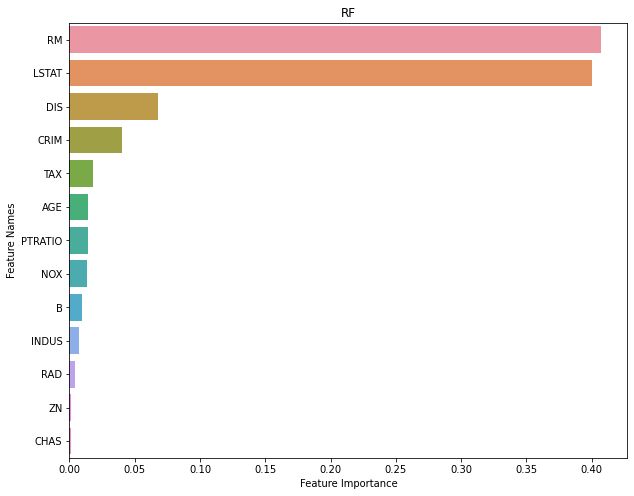

In [7]:
plot_feature_importance(model.feature_importances_, X_train.columns, 'RF')